# NSCI0007 Practice Exam 2
## Specimen Answers and Mark Scheme
- The specimen code below demonstrates one way to correctly answer the questions.
- Full marks will be awarded if the candidate has implemented another suitable method and the code behaves as specified in the question.
- If the candidate's code produces an error, or does not behave as specified in the question, partial credit will be awarded as described in the mark scheme.
- Where a candidate has used a different method to below, partial credit will be awarded in an analogous way.

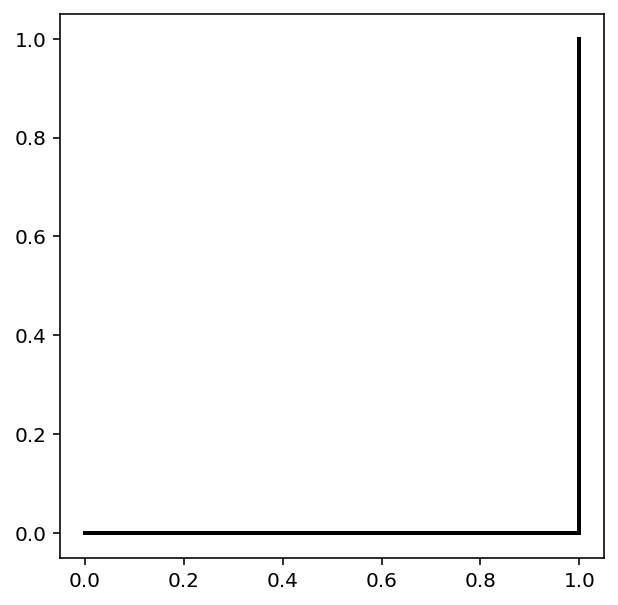

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def start(theta):
    state[0] = 0
    state[1] = 0
    state[2] = 0
    state[3] = theta
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    ax.set_aspect('equal', adjustable='box')
    
def draw_forward():
    x = state[0]
    y = state[1]
    angle = state[2]
    state[0] = x + np.cos(angle)
    state[1] = y + np.sin(angle)
    plt.plot([x, state[0]], [y, state[1]], color="black",
    linewidth=2)
    
def rotate_left():
    theta = state[3]
    state[2] = state[2] + theta * np.pi / 180

state = [0, 0, 0, 0]
    
# Example: draw an L
start(90)
draw_forward()
rotate_left()
draw_forward()

## Question 1

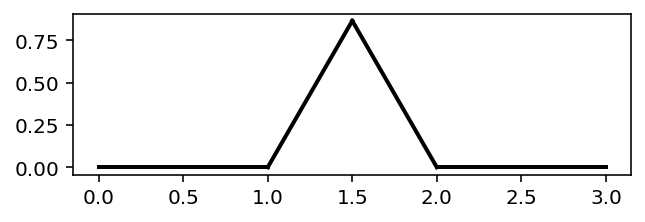

In [2]:
def rotate_right():
    theta = state[3]
    state[2] = state[2] - theta * np.pi / 180
    
start(60)
draw_forward()
rotate_left()
draw_forward()
rotate_right()
rotate_right()
draw_forward()
rotate_left()
draw_forward()

# [1] correct rotate_right function definition
# [1] call start with correct angle
# [1] correct sequence of function calls
    

## Question 2

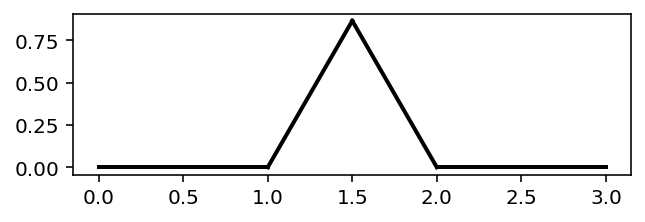

In [3]:
def draw_sequence(sequence, angle):
    start(angle)
    for c in sequence:
        if c == "F":
            draw_forward()
        if c == "-":
            rotate_left()
        if c == "+":
            rotate_right()
            
draw_sequence("F-F++F-F", 60)

# [1] call start
# [1] loop over characters
# [1] if statements
# [1] test passes correctly

## Question 3

In [4]:
def apply_koch_rule(sequence):
    s = ""
    for c in sequence:
        if c == "F":
            s += "F-F++F-F"
        else:
            s += c
    return s

def apply_koch_rule_2(sequence):
    return sequence.replace("F", "F-F++F-F")
            
            
apply_koch_rule("XFAF")

# [1] character replacement by either of above methods
# [1] test passes correctly


'XF-F++F-FAF-F++F-F'

## Question 4

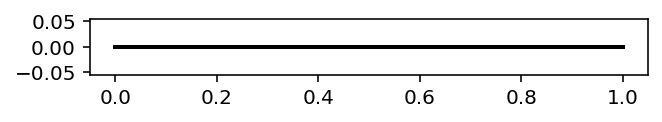

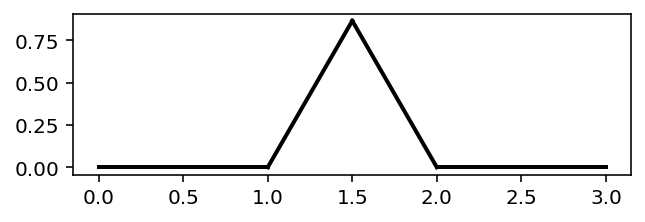

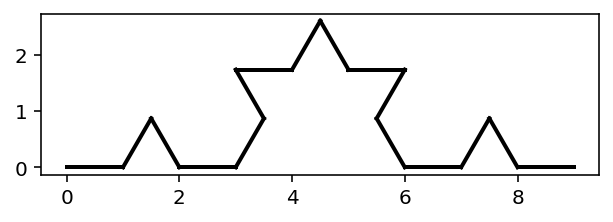

In [5]:
sequence = "F"
for i in range(3):
    draw_sequence(sequence, 60)
    sequence = apply_koch_rule(sequence)
    
# [1] loop with correct number of iterations
# [1] call two functions
# (alternatively use repeated code instead of loop)

    

## Question 5

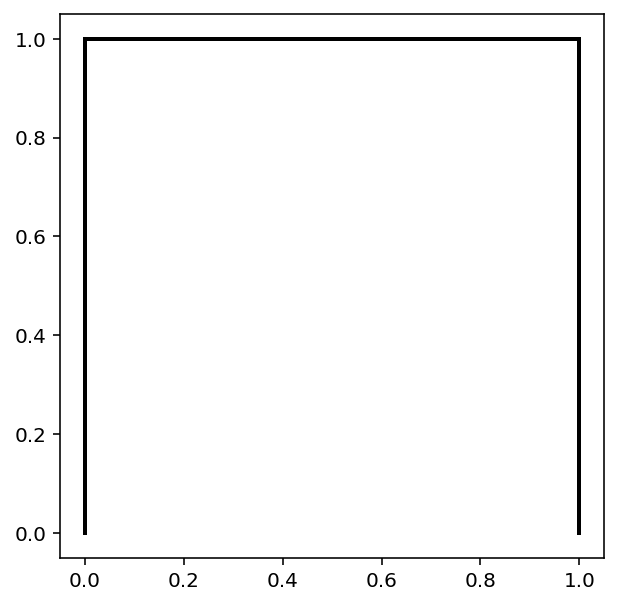

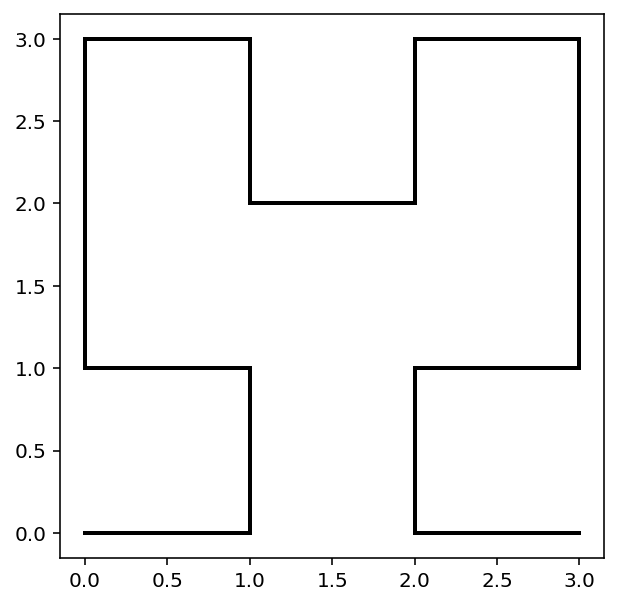

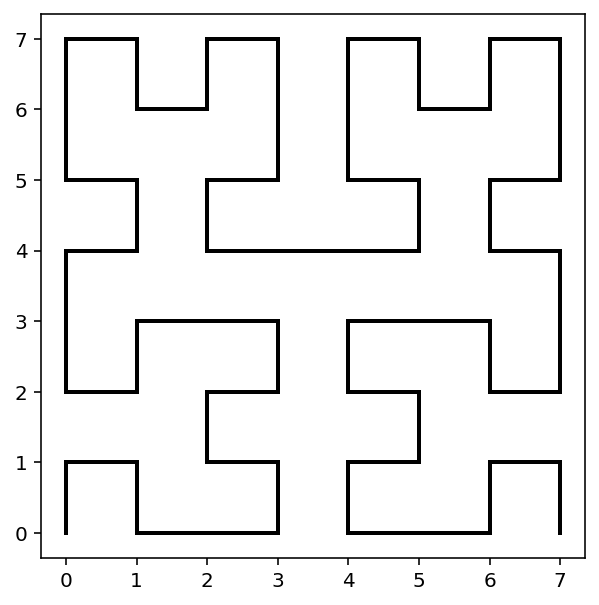

In [6]:
def apply_hilbert_rules(sequence):
    s = ""
    for c in sequence:
        if c == "X":
            s += "-YF+XFX+FY-"
        elif c == "Y":
            s += "+XF-YFY-FX+"
        else: s += c
        
    return s

apply_hilbert_rules("XY")

sequence = "X"
for i in range(3):
    sequence = apply_hilbert_rules(sequence)
    draw_sequence(sequence, 90)
    
# [1] loop over characters in string
# [1] if-elif statement
# [1] string concatentation
# [1] test passes correctly and three iterations drawn
# -1 if rewriting fails in general case (e.g. using string.replace)

## Question 6

In [7]:
def apply_rules(sequence, rule_list):
    symbol_list = []
    string_list = []
    for rule in rule_list:
        a, b = rule.split("->")
        symbol_list.append(a)
        string_list.append(b)
        s = ""
    for c in sequence:
        if c in symbol_list:
            i = symbol_list.index(c)
            d = string_list[i]
            s += d
        else:
            s += c
    return s
    

s1 = apply_rules("AB", ["A->AB", "B->BA"])
s2 = apply_rules("AB", ["A->XY", "B->XZ"])
print(s1, s2)

# [2] construct lists of symbols and strings
# [1] loop over characters
# [2] identify rule corresponding to character
# [1] concatenate string appropriately
# [1] tests pass correctly
# -1 if rewriting fails in general case (e.g. using string.replace)
# -1 if fails for rule_list of length more than 2
# -1 if fails for rule_list of length 1

ABBA XYXZ


## Question 7

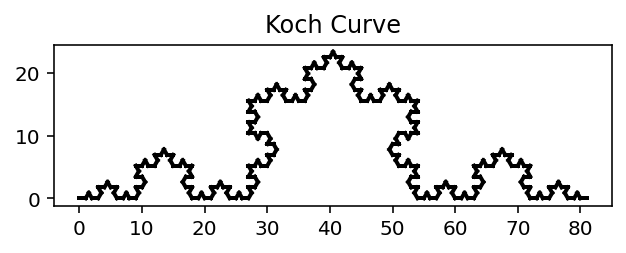

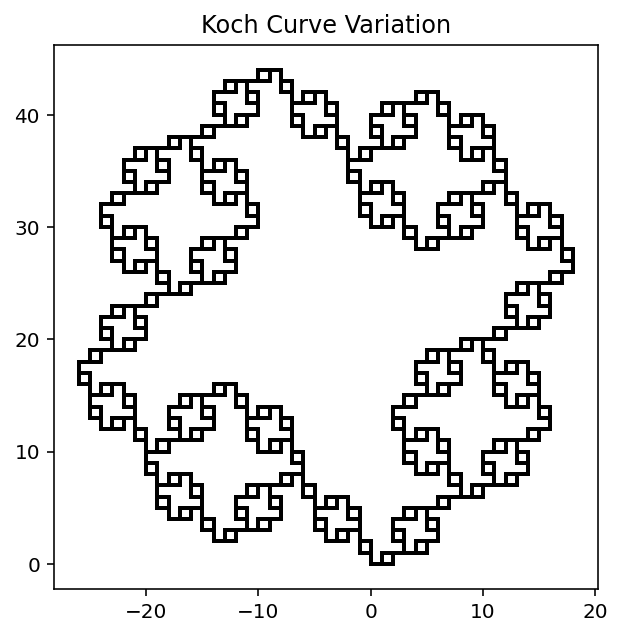

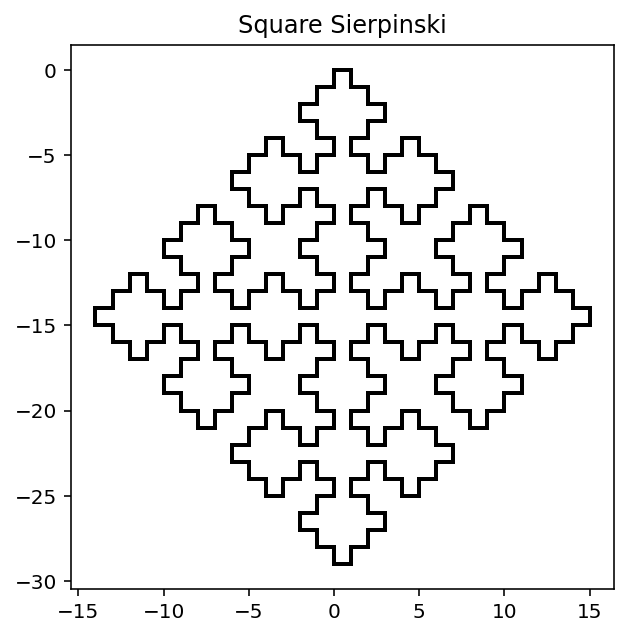

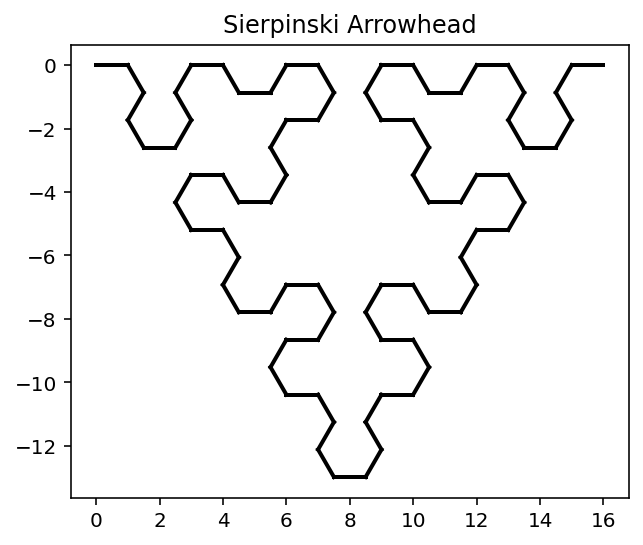

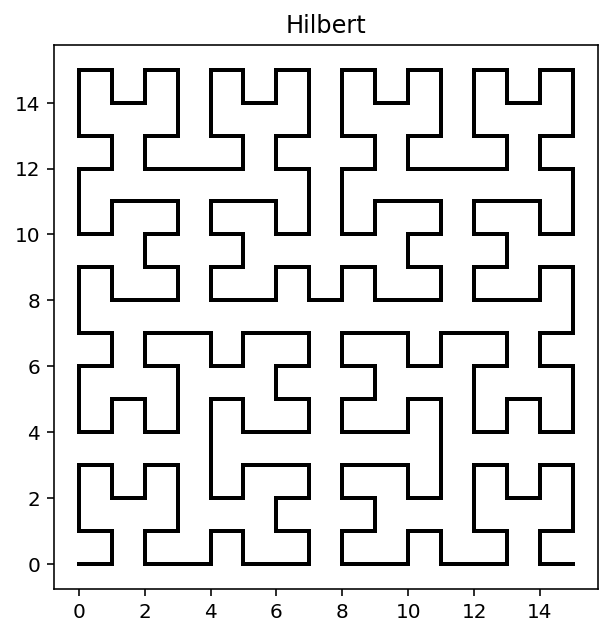

In [8]:
import csv

def draw_l_system(axiom, theta, rule_list, n):
    for i in range(n):
        axiom = apply_rules(axiom, rule_list)
    draw_sequence(axiom, theta)
    
with open("lsysdata.txt") as f:
    reader = csv.reader(f)
    next(reader)
    for row in reader:
        name = row[0]
        n = int(row[1])
        angle = float(row[2])
        axiom = row[3]
        rules = row[4:]
        draw_l_system(axiom, angle, rules, n)
        plt.title(name)
        
# [1] open file for reading
# [1] read one row at a time, omitting first line
# [2] identify name, n and angle with type conversion
# [1] extract rules as list of strings
# [2] draw the specified l-system
# [1] add title to plot
# -1 for each assumption the code makes about the contents of the file
# (e.g. number of lines)
        
